In [16]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [17]:
df = pd.read_csv("clear_data.csv")


In [18]:
df.shape

(6529, 18)

In [19]:
df.head()

,Unnamed: 0,team,position,height,age,appearance,goals,assists,red cards,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,9,Manchester United,Defender Left-Back,178,27,74,0.015374,0.169115,0.000000,0.0,5854,443,70,4,35000000,42000000,2,1
1,10,Manchester United,Defender Left-Back,169,23,89,0.012619,0.063096,0.000000,0.0,7132,182,15,3,22000000,22000000,2,1
2,11,Manchester United,Defender Left-Back,180,22,34,0.000000,0.033507,0.000000,0.0,2686,175,28,1,10000000,12000000,2,1
3,14,Manchester United,midfield-DefensiveMidfield,185,31,101,0.090817,0.124874,0.022704,0.0,7928,174,31,23,50000000,80000000,3,0
4,15,Manchester United,midfield-DefensiveMidfield,191,26,76,0.096010,0.038404,0.000000,0.0,4687,249,53,2,25000000,35000000,3,0


In [20]:
df.drop('Unnamed: 0', axis=1 , inplace=True)

In [21]:
df.head()

,team,position,height,age,appearance,goals,assists,red cards,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Defender Left-Back,178,27,74,0.015374,0.169115,0.000000,0.0,5854,443,70,4,35000000,42000000,2,1
1,Manchester United,Defender Left-Back,169,23,89,0.012619,0.063096,0.000000,0.0,7132,182,15,3,22000000,22000000,2,1
2,Manchester United,Defender Left-Back,180,22,34,0.000000,0.033507,0.000000,0.0,2686,175,28,1,10000000,12000000,2,1
3,Manchester United,midfield-DefensiveMidfield,185,31,101,0.090817,0.124874,0.022704,0.0,7928,174,31,23,50000000,80000000,3,0
4,Manchester United,midfield-DefensiveMidfield,191,26,76,0.096010,0.038404,0.000000,0.0,4687,249,53,2,25000000,35000000,3,0


In [22]:
categorical_features = [ 'team','position']
numeric_features = ['height', 'age', 'appearance','goals', 'assists', 'yellow cards','second yellow cards', 'red cards', 'goals conceded','clean sheets', 'minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded','winger']

In [23]:
for i in categorical_features:
    print (df[i].value_counts())

team
Royal AM FC               30
Al-Batin FC               28
Gangwon FC                28
Daejeon Hana Citizen      28
Jeonbuk Hyundai Motors    28
                          ..
Swansea City              12
Manchester City           11
Paris Saint-Germain       11
Gaziantep FK               5
Hatayspor                  5
Name: count, Length: 374, dtype: int64
position
Attack Centre-Forward         1294
midfield-CentralMidfield      1106
midfield-DefensiveMidfield     867
Defender Left-Back             774
midfield-AttackingMidfield     745
Attack-RightWinger             695
Attack-LeftWinger              694
midfield-RightMidfield          97
midfield-LeftMidfield           97
Attack-SecondStriker            62
midfield                        58
Attack                          40
Name: count, dtype: int64


In [24]:
categorical_features


['team', 'position']

In [25]:
df = pd.get_dummies(df, columns=categorical_features)

In [26]:
df.head(2)

,height,age,appearance,goals,assists,red cards,clean sheets,minutes played,days_injured,games_injured,...,position_Attack-LeftWinger,position_Attack-RightWinger,position_Attack-SecondStriker,position_Defender Left-Back,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,178,27,74,0.015374,0.169115,0.0,0.0,5854,443,70,...,False,False,False,True,False,False,False,False,False,False
1,169,23,89,0.012619,0.063096,0.0,0.0,7132,182,15,...,False,False,False,True,False,False,False,False,False,False


In [27]:
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
df['players_price_category'] = df['current_value'].apply(categorize_price)

df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['players_price_category'].value_counts())

players_price_category
Good_Price     2639
Cheap_Price    2103
High_Price     1787
Name: count, dtype: int64


In [28]:
p35, p75

(500000.0, 3000000.0)

In [29]:
encoder = LabelEncoder()
df['players_price_category_encoded'] = encoder.fit_transform(df['players_price_category'])  

In [30]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['players_price_category_encoded'].sort_values(ascending=False))

players_price_category_encoded    1.000000
appearance                        0.517344
highest_value                     0.511614
minutes played                    0.505380
award                             0.262643
                                    ...   
team_Swallows FC                 -0.076503
team_Royal AM FC                 -0.078046
position_Attack                  -0.096984
position_midfield                -0.114828
clean sheets                           NaN
Name: players_price_category_encoded, Length: 401, dtype: float64


In [31]:
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['players_price_category_encoded']) > \
threshold]['players_price_category_encoded'].index
selected_features

Index(['appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'highest_value', 'players_price_category_encoded'],
      dtype='object')

In [32]:
selected_features = ['appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'highest_value', 'players_price_category_encoded']

In [33]:
df = df[selected_features]
df.head()

,appearance,minutes played,days_injured,games_injured,award,highest_value,players_price_category_encoded
0,74,5854,443,70,4,42000000,2
1,89,7132,182,15,3,22000000,2
2,34,2686,175,28,1,12000000,2
3,101,7928,174,31,23,80000000,2
4,76,4687,249,53,2,35000000,2


In [34]:
X = df.drop(['players_price_category_encoded'], axis=1)


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X.shape


(6529, 6)

In [36]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 

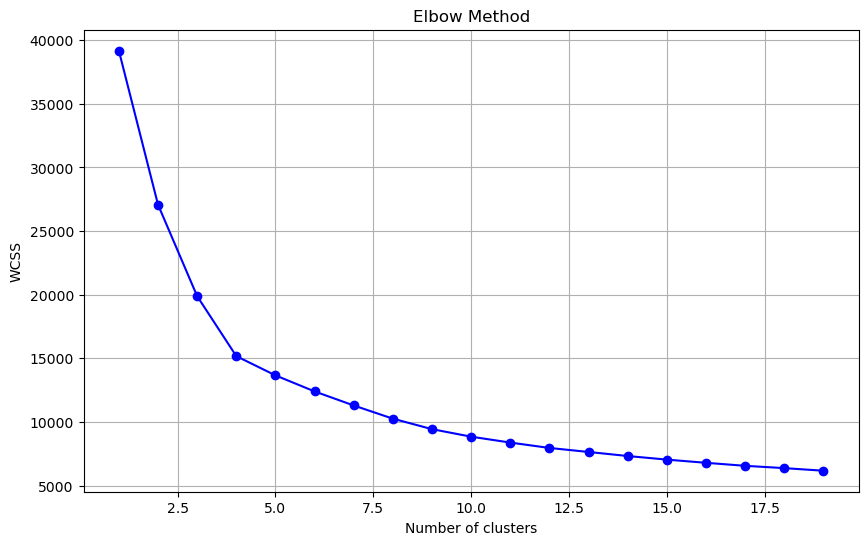

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [38]:
optimal_clusters = 8 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [39]:
y_pred = model.fit_predict(X_scaled)


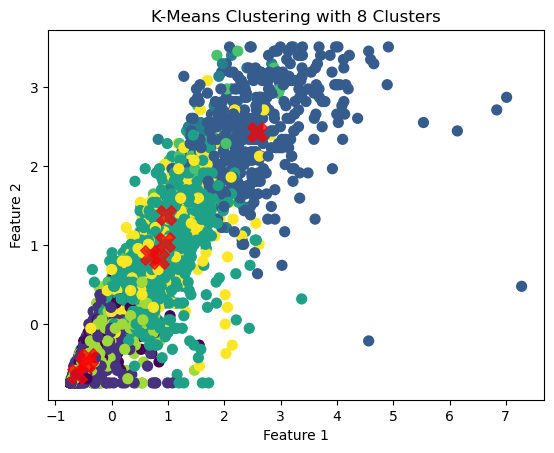

In [41]:
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()